In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_raw_corrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid.nc')
age_data_raw_uncorrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")
age_model_40 = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [3]:
np.nanmax(age_data_raw_uncorrupt["age_c"].data/age_data_raw_uncorrupt["age_c_uncert_real"].data)

25.000000000000004

In [4]:
ratio = age_data_raw_corrupt["age_norm"][:21].data/age_data_raw_corrupt["age_norm_uncert"][:21].data
np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1]

array([           nan, 4.79311940e+07, 4.79239021e+07, ...,
       6.09255908e-03, 6.03851074e-03, 5.99545150e-03])

In [5]:
ratio_thres = 100
np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] > ratio_thres) / \
(np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] > ratio_thres) + np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] <= ratio_thres))

0.012061349643589455

In [6]:
ratio_thres = 25
np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] > ratio_thres) / \
(np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] > ratio_thres) + np.nansum(np.unique(np.sort(np.reshape(ratio, (-1,))))[::-1] <= ratio_thres))

0.416224494954445

In [7]:
age_data_40["age_c"].data[:, 35, 20], age_data_40["age_c_uncert_real"].data[:, 35, 20]

(array([ -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        , 12765.10429811, 12488.42024238,
        12204.73189643, 11913.86194581, 11292.63349295, 10646.80955387,
         9984.63650394,  9452.94757903,  9078.27168543,  8694.11082642,
         8311.39010029,  7954.3215153 ,  7588.21369605,  7219.22943067,
         6859.44081263,  6490.54410237,  6144.21623469,  5823.78

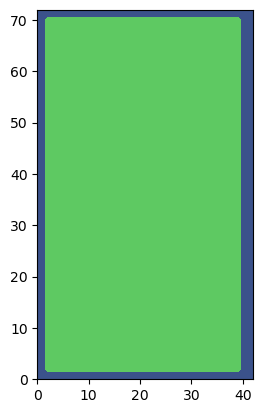

In [8]:
plt.contourf(H_data_40["H"]>=0)
plt.gca().set_aspect('equal')

In [9]:
H_data = H_data_40["H"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert"].data
age_c_uncert_real_data = age_data_40["age_c_uncert_real"].data
age_c_model = age_model_40["age_c"].data

In [10]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([ 6065.26296095,  6203.91189058,  6358.47081396,  6541.25832062,
         6745.53731763,  6952.97626001,  7131.27719218,  7241.91213297,
         7246.64134614,  7100.74320667, 23182.20552651, 20719.33806551,
        17734.52194284, 14543.72037537, 11525.01512105,  8932.24391636,
         6858.83518556,  9798.1006492 ,  7345.61934016,  5509.54019626,
         4133.80476512,  3107.06925698,  2355.44001497,  2969.73215226,
         2310.00826411,  1823.56309979,  1482.21672622,  1276.31974393,
         1220.56170912,  1191.45689708,  1118.78229941,  1113.25546324,
         1220.21770277,  1498.51188892,  1447.01601433,  1486.27343844,
         1517.89876645,  1728.63567559,  1809.50717539,  1819.18551984,
         1882.12564408,  2071.36373539,  2202.49114411,  2244.48068133,
         2323.73355221,  2368.27353147,  2328.05341045,  2257.26097329,
         2195.53627221,  2136.89627466,  2087.41418268,  2026.62521391,
         1983.54250446,  1928.455861  ,  1880.65505517,  1838.46

In [11]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_real_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio_real = mask*age_c_data/age_c_uncert_real_data
field_real = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_real_data**2

np.sum(field_real, axis = (1,2)), np.sum(field_real), np.max(mask*age_c_data/age_c_uncert_real_data)

(array([33665.04338596, 34541.1879593 , 35486.1175273 , 36521.95101956,
        37609.51199655, 38637.82049111, 39409.37022966, 39694.2094451 ,
        39281.55889399, 37951.81058547, 35463.96125832, 31727.24637468,
        27148.93392315, 22195.44961292, 17520.89512587, 13517.51270063,
        10309.72530874,  7820.14977802,  5915.3444601 ,  4473.80131349,
         3382.76404703,  2556.39334228,  1957.95180313,  1598.04684592,
         1290.3042324 ,  1061.58479359,   966.78032874,   985.07557709,
         1159.52954133,  5129.1236177 ,  4867.60035919,  4896.53228163,
         5377.17025587,  6655.68309556,  6259.50333794,  6290.68846077,
         6392.59123325,  7381.43917002,  7873.91145021,  8049.10607311,
         8538.11424235,  9749.04421476, 10046.74122419, 10035.58519722,
        10285.40166638, 10505.83703544, 10295.16800465, 10053.45896247,
         9951.69113154,  9676.8813424 ,  9581.73038236,  9466.10780845,
         9072.97439463,  8712.15323799,  8451.0186232 ,  8237.09

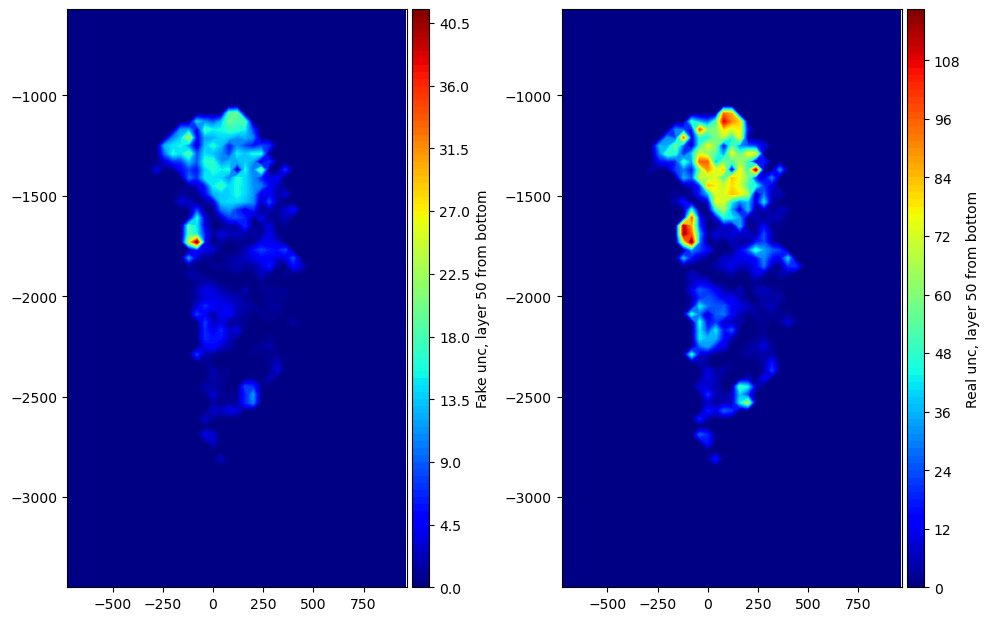

In [12]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 50 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 50 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()

In [13]:
temp = np.reshape(field, (-1,))
temp_real = np.reshape(field_real, (-1,))
np.sum(np.sort(temp)[::-1][:10])/np.sum(field), np.sum(np.sort(temp_real)[::-1][:10])/np.sum(field_real)

(0.1399881869652571, 0.14551891194334662)

In [14]:
temp = np.reshape(field, (-1,))
temp_real = np.reshape(field_real, (-1,))
np.sum(np.sort(temp)[::-1][:1000])/np.sum(field), np.sum(np.sort(temp_real)[::-1][:1000])/np.sum(field_real)

(0.7480155381850409, 0.6866520549966904)

In [15]:
np.sum(temp>0)

22865